In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the Dataset

In [15]:
world_covid_df = pd.read_csv('E:/My Project/Covid-19 Data Analysis/owid-covid-data.csv')
world_covid_df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
5,AFG,Asia,Afghanistan,2020-02-29,1.0,0.0,0.143,NaN,NaN,0.0,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
6,AFG,Asia,Afghanistan,2020-03-01,1.0,0.0,0.143,NaN,NaN,0.0,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
7,AFG,Asia,Afghanistan,2020-03-02,1.0,0.0,0.000,NaN,NaN,0.0,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
8,AFG,Asia,Afghanistan,2020-03-03,2.0,1.0,0.143,NaN,NaN,0.0,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
9,AFG,Asia,Afghanistan,2020-03-04,4.0,2.0,0.429,NaN,NaN,0.0,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [16]:
print(world_covid_df.shape)
print(world_covid_df.columns)
print(world_covid_df.info())

(111309, 62)
Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothe

Lấy các cột chính cần thiết trong việc phân tích và lưu vào 1 dataframe mới

In [17]:
world_covid_df = world_covid_df[['continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'population', 'population_density', 'reproduction_rate',
        'median_age','aged_70_older', 'gdp_per_capita','life_expectancy', 'human_development_index'
        ]]
print(world_covid_df.dtypes)
world_covid_df.head()

continent                   object
location                    object
date                        object
total_cases                float64
new_cases                  float64
total_deaths               float64
new_deaths                 float64
population                 float64
population_density         float64
reproduction_rate          float64
median_age                 float64
aged_70_older              float64
gdp_per_capita             float64
life_expectancy            float64
human_development_index    float64
dtype: object


,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,population,population_density,reproduction_rate,median_age,aged_70_older,gdp_per_capita,life_expectancy,human_development_index
0,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,38928341.0,54.422,NaN,18.6,1.337,1803.987,64.83,0.511
1,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,38928341.0,54.422,NaN,18.6,1.337,1803.987,64.83,0.511
2,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,38928341.0,54.422,NaN,18.6,1.337,1803.987,64.83,0.511
3,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,38928341.0,54.422,NaN,18.6,1.337,1803.987,64.83,0.511
4,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,38928341.0,54.422,NaN,18.6,1.337,1803.987,64.83,0.511


Thay các cột NaN bằng giá trị 0

In [18]:
world_covid_df.replace(np.NaN, 0, inplace=True)
print(world_covid_df.dtypes)
world_covid_df.head()

continent                   object
location                    object
date                        object
total_cases                float64
new_cases                  float64
total_deaths               float64
new_deaths                 float64
population                 float64
population_density         float64
reproduction_rate          float64
median_age                 float64
aged_70_older              float64
gdp_per_capita             float64
life_expectancy            float64
human_development_index    float64
dtype: object


,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,population,population_density,reproduction_rate,median_age,aged_70_older,gdp_per_capita,life_expectancy,human_development_index
0,Asia,Afghanistan,2020-02-24,1.0,1.0,0.0,0.0,38928341.0,54.422,0.0,18.6,1.337,1803.987,64.83,0.511
1,Asia,Afghanistan,2020-02-25,1.0,0.0,0.0,0.0,38928341.0,54.422,0.0,18.6,1.337,1803.987,64.83,0.511
2,Asia,Afghanistan,2020-02-26,1.0,0.0,0.0,0.0,38928341.0,54.422,0.0,18.6,1.337,1803.987,64.83,0.511
3,Asia,Afghanistan,2020-02-27,1.0,0.0,0.0,0.0,38928341.0,54.422,0.0,18.6,1.337,1803.987,64.83,0.511
4,Asia,Afghanistan,2020-02-28,1.0,0.0,0.0,0.0,38928341.0,54.422,0.0,18.6,1.337,1803.987,64.83,0.511


# Task 1: Phân tích dữ liệu Covid trên thế giới

#### 1.1. Sắp xếp các nước theo số ca mắc

In [42]:
latest_update = world_covid_df.loc[world_covid_df['date']=='2021-08-22']
latest_update = latest_update.loc[latest_update['continent']!=0]
latest_update.sort_values(['total_cases'], ascending=False, axis=0, inplace=True)
latest_update.head(10)       # Top 10 QG có nhiều ca mắc nhất

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,population,population_density,reproduction_rate,median_age,aged_70_older,gdp_per_capita,life_expectancy,human_development_index
106058,North America,United States,2021-08-22,37709810.0,36692.0,628503.0,200.0,3.310026e+08,35.608,0.0,38.3,9.732,54225.446,78.86,0.926
46540,Asia,India,2021-08-22,32449306.0,25072.0,434756.0,389.0,1.380004e+09,450.419,0.0,28.2,3.414,6426.674,69.66,0.645
14654,South America,Brazil,2021-08-22,20570891.0,14404.0,574527.0,318.0,2.125594e+08,25.040,0.0,33.5,5.060,14103.452,75.88,0.765
36529,Europe,France,2021-08-22,6700252.0,17300.0,113472.0,0.0,6.756425e+07,122.578,0.0,42.0,13.079,38605.671,82.66,0.901
83189,Europe,Russia,2021-08-22,6653498.0,19977.0,173003.0,746.0,1.459345e+08,8.823,0.0,39.6,9.393,24765.954,72.58,0.824
105479,Europe,United Kingdom,2021-08-22,6523563.0,32034.0,131958.0,49.0,6.788600e+07,272.898,0.0,40.8,12.527,39753.244,81.32,0.932
103012,Asia,Turkey,2021-08-22,6215633.0,18622.0,54533.0,206.0,8.433907e+07,104.914,0.0,31.6,5.061,25129.341,77.69,0.820
4564,South America,Argentina,2021-08-22,5133831.0,2979.0,110352.0,135.0,4.519578e+07,16.177,0.0,31.9,7.441,18933.907,76.67,0.845
21997,South America,Colombia,2021-08-22,4889537.0,2640.0,124216.0,95.0,5.088288e+07,44.223,0.0,32.2,4.312,13254.949,77.29,0.767
94750,Europe,Spain,2021-08-22,4770453.0,0.0,83136.0,0.0,4.675478e+07,93.105,0.0,45.5,13.799,34272.360,83.56,0.904


#### 1.2. Top các nước có nhiều ca tử vong nhất

In [44]:
latest_update.sort_values(['total_deaths'], ascending=False, axis=0, inplace=True)
latest_update.head(10)

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,population,population_density,reproduction_rate,median_age,aged_70_older,gdp_per_capita,life_expectancy,human_development_index
106058,North America,United States,2021-08-22,37709810.0,36692.0,628503.0,200.0,3.310026e+08,35.608,0.0,38.3,9.732,54225.446,78.86,0.926
14654,South America,Brazil,2021-08-22,20570891.0,14404.0,574527.0,318.0,2.125594e+08,25.040,0.0,33.5,5.060,14103.452,75.88,0.765
46540,Asia,India,2021-08-22,32449306.0,25072.0,434756.0,389.0,1.380004e+09,450.419,0.0,28.2,3.414,6426.674,69.66,0.645
65304,North America,Mexico,2021-08-22,3225073.0,7658.0,253155.0,228.0,1.289328e+08,66.444,0.0,29.3,4.321,17336.469,75.05,0.779
79826,South America,Peru,2021-08-22,2141235.0,1173.0,197818.0,66.0,3.297185e+07,25.129,0.0,29.1,4.455,12236.706,76.74,0.777
83189,Europe,Russia,2021-08-22,6653498.0,19977.0,173003.0,746.0,1.459345e+08,8.823,0.0,39.6,9.393,24765.954,72.58,0.824
105479,Europe,United Kingdom,2021-08-22,6523563.0,32034.0,131958.0,49.0,6.788600e+07,272.898,0.0,40.8,12.527,39753.244,81.32,0.932
50613,Europe,Italy,2021-08-22,4484613.0,5922.0,128751.0,23.0,6.046183e+07,205.859,0.0,47.9,16.240,35220.084,83.51,0.892
47079,Asia,Indonesia,2021-08-22,3979456.0,12408.0,126372.0,1030.0,2.735236e+08,145.725,0.0,29.3,3.053,11188.744,71.72,0.718
21997,South America,Colombia,2021-08-22,4889537.0,2640.0,124216.0,95.0,5.088288e+07,44.223,0.0,32.2,4.312,13254.949,77.29,0.767


#### 1.3. Top các nước có tỉ lệ tử vong trên số ca mắc cao nhất

In [47]:
latest_update['deaths_per_total_cases'] = latest_update['total_deaths'] / latest_update['total_cases'] * 100
latest_update.sort_values(['deaths_per_total_cases'], ascending=False, axis=0, inplace=True)
latest_update[['location','deaths_per_total_cases']].head(10)

,location,deaths_per_total_cases
107398,Vanuatu,25.000000
110264,Yemen,18.884006
79826,Peru,9.238500
65304,Mexico,7.849590
95853,Sudan,7.501329
98013,Syria,7.326865
29637,Ecuador,6.460115
30193,Egypt,5.821856
91985,Somalia,5.468517
98598,Taiwan,5.199046


#### 1.4. Top các nước có tỉ lệ dân số thiệt hại do Covid nhiều nhất

In [48]:
latest_update['deaths_per_population'] = latest_update['total_deaths'] / latest_update['population'] *100
latest_update.sort_values(['deaths_per_population'], ascending=False, axis=0, inplace=True)
latest_update[['location','deaths_per_population','population','total_deaths']].head(10)

,location,deaths_per_population,population,total_deaths
79826,Peru,0.599960,32971846.0,197818.0
45426,Hungary,0.311024,9660350.0,30046.0
13599,Bosnia and Herzegovina,0.296329,3280815.0,9722.0
26417,Czechia,0.283734,10708982.0,30385.0
74676,North Macedonia,0.272058,2083380.0,5668.0
14654,Brazil,0.270290,212559409.0,574527.0
67647,Montenegro,0.266057,628062.0,1671.0
15804,Bulgaria,0.265887,6948445.0,18475.0
86199,San Marino,0.265189,33938.0,90.0
4564,Argentina,0.244164,45195777.0,110352.0


#### 1.5. Số ca mắc, tử vong theo ngày, chia theo châu lục

In [76]:
# Tạo 1 dataframe riêng về số ca mắc, tử von xét theo châu lục
useful_cols = ['date','continent','location','new_cases']
continent_cases_df = world_covid_df[useful_cols].loc[world_covid_df['continent']==0]
continent_cases_df.drop(['continent'], axis=1, inplace=True)
continent_cases_df.set_index('date', inplace=True)
continent_cases_df.head()

,location,new_cases
date,,
2020-02-13,Africa,0.0
2020-02-14,Africa,1.0
2020-02-15,Africa,0.0
2020-02-16,Africa,0.0
2020-02-17,Africa,0.0


In [153]:
list_continents = list(continent_cases_df['location'].unique())

# KHởi tạo 
results = continent_cases_df.loc[continent_cases_df['location']=='Africa']

for continent in list_continents:
    # temp_df chứa các thông tin về ca mới mỗi ngày của từng châu lục (qua mỗi vòng for)
    temp_df = continent_cases_df.loc[continent_cases_df['location']==continent]
    temp_df.rename(columns={'new_cases': continent}, inplace=True)
    
    # ghép nối temp_df vào continents_cases_df
    results = pd.concat([results, temp_df], axis=1).drop(labels=['location'], axis=1)
    del temp_df

print(results.shape)
results.head()

E:\Anaconda\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


(579, 10)


,new_cases,Africa,Asia,Europe,European Union,International,North America,Oceania,South America,World
date,,,,,,,,,,
2020-01-22,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0
2020-01-23,NaN,NaN,98.0,0.0,0.0,NaN,0.0,NaN,NaN,98.0
2020-01-24,NaN,NaN,283.0,2.0,2.0,NaN,1.0,NaN,NaN,286.0
2020-01-25,NaN,NaN,491.0,1.0,1.0,NaN,0.0,0.0,NaN,492.0
2020-01-26,NaN,NaN,677.0,0.0,0.0,NaN,4.0,4.0,NaN,685.0


Làm sạch dữ liệu kết quả:

In [154]:
results.drop(results[['new_cases','International','European Union','World']], axis=1, inplace=True)
results.replace(np.NaN, 0, inplace=True)
results.tail()

,Africa,Asia,Europe,North America,Oceania,South America
date,,,,,,
2021-08-18,44197.0,263246.0,149499.0,190336.0,1420.0,58856.0
2021-08-19,39483.0,268213.0,146482.0,185098.0,1520.0,55910.0
2021-08-20,36991.0,264320.0,145358.0,366954.0,1400.0,49009.0
2021-08-21,30805.0,243075.0,117702.0,97154.0,1129.0,41650.0
2021-08-22,27357.0,234560.0,103272.0,57393.0,1236.0,22533.0


Vẽ biểu đồ chuỗi thời gian về số ca mắc mỗi ngày trên 6 lục địa:

Text(0, 0.5, 'Số ca nhiễm')

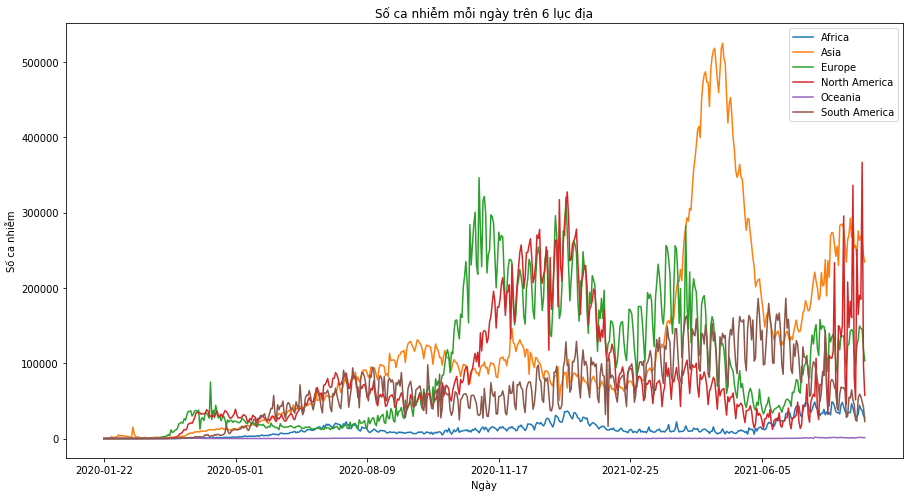

In [169]:
results.plot(figsize=(15,8))
plt.title('Số ca nhiễm mỗi ngày trên 6 lục địa')
plt.xticks(ticks=np.arange(0,600,100), labels=[results.index[i] for i in range(0,600,100)] )
plt.xlabel('Ngày')
plt.ylabel('Số ca nhiễm')

Số ca tử vong mỗi ngày theo mỗi châu lục, tính tương tự như trên.

In [170]:
# Tạo 1 dataframe riêng về số ca mắc, tử von xét theo châu lục
useful_cols = ['date','continent','location','new_deaths']
continent_deaths_df = world_covid_df[useful_cols].loc[world_covid_df['continent']==0]
continent_deaths_df.drop(['continent'], axis=1, inplace=True)
continent_deaths_df.set_index('date', inplace=True)
continent_deaths_df.head()

,location,new_deaths
date,,
2020-02-13,Africa,0.0
2020-02-14,Africa,0.0
2020-02-15,Africa,0.0
2020-02-16,Africa,0.0
2020-02-17,Africa,0.0


In [174]:
list_continents = list(continent_deaths_df['location'].unique())

# KHởi tạo 
results_1 = continent_deaths_df.loc[continent_deaths_df['location']=='Africa']

for continent in list_continents:
    # temp_df chứa các thông tin về ca mới mỗi ngày của từng châu lục (qua mỗi vòng for)
    temp_df = continent_deaths_df.loc[continent_deaths_df['location']==continent]
    temp_df.rename(columns={'new_deaths': continent}, inplace=True)
    
    # ghép nối temp_df vào continents_cases_df
    results_1 = pd.concat([results_1, temp_df], axis=1).drop(labels=['location'], axis=1)
    del temp_df

# Làm sạch dữ liệu
results_1.drop(results_1[['new_deaths','International','European Union','World']], axis=1, inplace=True)
results_1.replace(np.NaN, 0, inplace=True)

print(results_1.shape)
results_1.tail()

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


(579, 6)


,Africa,Asia,Europe,North America,Oceania,South America
date,,,,,,
2021-08-18,1024.0,4316.0,1491.0,2367.0,10.0,1603.0
2021-08-19,756.0,4864.0,1450.0,1955.0,12.0,1578.0
2021-08-20,701.0,4512.0,1391.0,3712.0,13.0,1345.0
2021-08-21,630.0,4313.0,1138.0,1500.0,4.0,1073.0
2021-08-22,647.0,4629.0,1009.0,563.0,8.0,691.0


Vẽ biểu đồ chuỗi thời gian về số ca tử vong mỗi ngày trên 6 lục địa:

Text(0, 0.5, 'Số ca tử vong')

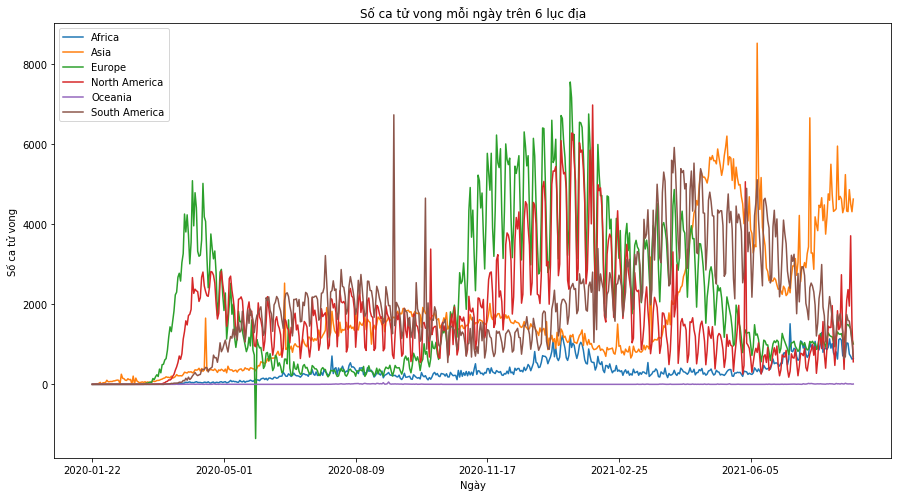

In [175]:
results_1.plot(figsize=(15,8))
plt.title('Số ca tử vong mỗi ngày trên 6 lục địa')
plt.xticks(ticks=np.arange(0,600,100), labels=[results.index[i] for i in range(0,600,100)] )
plt.xlabel('Ngày')
plt.ylabel('Số ca tử vong')

#### 1.6. Ngày nào có số ca nhiễm tăng nhiều nhất trên toàn thế giới

In [180]:
continent_cases_df.loc[ continent_cases_df['new_cases'] == continent_cases_df['new_cases'].max() ]

,location,new_cases
date,,
2021-04-28,World,905993.0


==> Đó là ngày 28/04/2021. Có tới 905993 ca nhiễm mới trong ngày

Tương tự, ta cũng xác định được ngày có nhiều ca tử vong nhất:

In [181]:
continent_deaths_df.loc[ continent_deaths_df['new_deaths'] == continent_deaths_df['new_deaths'].max() ]

,location,new_deaths
date,,
2021-01-20,World,18000.0


#### 1.7. So sánh mức độ lây lan dịch của Anh, Mỹ, Đức, Brazil, Italia

In [184]:
# Tạo 1 dataframe riêng về mức độ lây lan (reproduction_rate) xét theo 5 QG: Anh, Mỹ, Đức, Brazil, Italia
list_five = ['England', 'United States','Germany','Brazil','Italia']
useful_cols = ['date','location','reproduction_rate']
five_countries = world_covid_df[useful_cols].loc[world_covid_df['location'].isin(list_five) ]
five_countries.set_index('date', inplace=True)
five_countries.head()

,location,reproduction_rate
date,,
2020-02-26,Brazil,0.0
2020-02-27,Brazil,0.0
2020-02-28,Brazil,0.0
2020-02-29,Brazil,0.0
2020-03-01,Brazil,0.0


In [185]:
# KHởi tạo 
results_2 = five_countries.loc[five_countries['location']=='Brazil']

for country in list_five:
    # temp_df chứa các thông tin về mức độ lây lan của từng QG trong list
    temp_df = five_countries.loc[five_countries['location']==country]
    temp_df.rename(columns={'reproduction_rate': country}, inplace=True)
    
    # ghép nối temp_df vào continents_cases_df
    results_2 = pd.concat([results_2, temp_df], axis=1).drop(labels=['location'], axis=1)
    del temp_df

# Làm sạch dữ liệu
results_2.drop(['reproduction_rate'], axis=1, inplace=True)
results_2.replace(np.NaN, 0, inplace=True)

print(results_2.shape)
results_2.tail()

E:\Anaconda\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


(581, 5)


,England,United States,Germany,Brazil,Italia
2021-08-18,0.0,1.22,1.38,0.97,0.0
2021-08-19,0.0,0.00,0.00,0.00,0.0
2021-08-20,0.0,0.00,0.00,0.00,0.0
2021-08-21,0.0,0.00,0.00,0.00,0.0
2021-08-22,0.0,0.00,0.00,0.00,0.0


Vẽ biểu đồ mức độ lây lan Covid tại 5 QG này:

Text(0, 0.5, 'Mức độ lây lan')

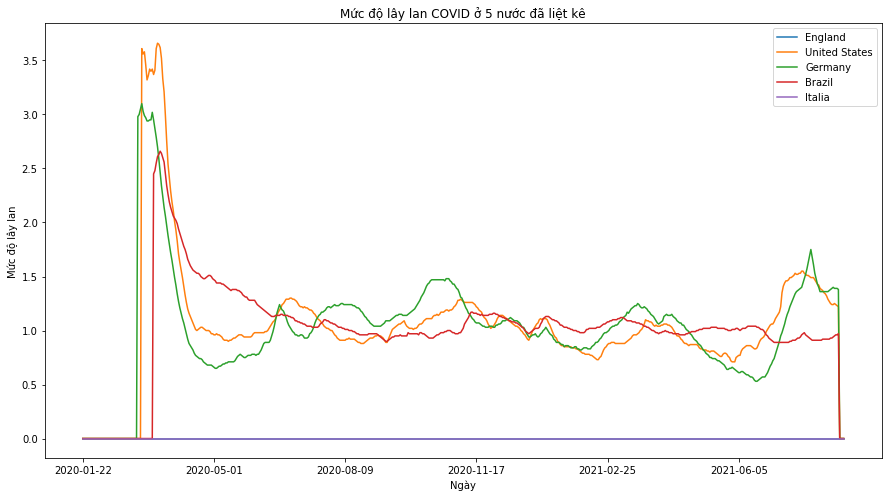

In [186]:
results_2.plot(figsize=(15,8))
plt.title('Mức độ lây lan COVID ở 5 nước đã liệt kê')
plt.xticks(ticks=np.arange(0,600,100), labels=[results.index[i] for i in range(0,600,100)] )
plt.xlabel('Ngày')
plt.ylabel('Mức độ lây lan')

#### 1.8. Nước nào phòng dịch tốt nhất ? ( có số ca mắc TB trong 1 ngày ít nhất từ trước đến nay)

In [196]:
average_df = world_covid_df[['date','location','new_cases']].groupby(['location'], as_index=False).mean()
average_df.sort_values(['new_cases'], ascending=True, axis=0, inplace=True)
average_df.head(10)

,location,new_cases
209,Tokelau,0.0
147,New Caledonia,0.0
86,Guernsey,0.0
101,Isle of Man,0.0
23,Bermuda,0.0
123,Macao,0.0
26,Bonaire Sint Eustatius and Saba,0.0
83,Greenland,0.0
174,Saint Helena,0.0
30,British Virgin Islands,0.0


Các nước trên đều có dân số rất ít, nên việc chưa có ca mắc nào từ trước đến nay chưa thể thể hiện đó là nước phòng dịch tốt nhất. Do đó ta cần thêm điều kiện về dân số tối thiểu của 1 QG vào trong Task này, ví dụ ta hãy coi các nước được xét cần phải có dân số từ 10 triệu người đổ lên.

In [207]:
large_population = world_covid_df.loc[world_covid_df['population'] > 10e6 ]
average_df = large_population[['date','location','new_cases']].groupby(['location'], as_index=False).mean()
average_df.sort_values(['new_cases'], ascending=True, axis=0, inplace=True)
average_df.head(10)

,location,new_cases
83,Tanzania,2.603810
18,Chad,9.549808
58,Niger,11.074856
95,Yemen,15.018000
10,Benin,19.396190
14,Burundi,21.158824
76,South Sudan,22.396040
13,Burkina Faso,25.824859
82,Taiwan,27.222222
51,Mali,28.598837


==> Tanzania là nước đứng đầu bảng trong bảng xếp hạng phòng dịch này.